___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

**Demographic/Administrative Data:**
**subjectid :**  – A unique number for each participant measured in the anthropometric survey, ranging from 10027 to 920103, not inclusive
**SubjectBirthLocation:** – Subject Birth Location; a U.S. state or foreign country
**SubjectNumericRace:** – Subject Numeric Race; a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview). Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other
**Ethnicity:** – self-reported ethnicity (verified through interview); e.g. “Mexican”, “Vietnamese”
**DODRace:** – Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option. This variable is intended to be comparable to the Defense Manpower Data Center demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other
**Gender:** – “Male” or “Female”
**Age:** – Participant’s age in years
**Heightin:** – Height in Inches; self-reported, comparable to measured “stature”
**Weightlbs:** – Weight in Pounds; self-reported, comparable to measured “weightkg”
**WritingPreference – Writing Preference:** “Right hand”, “Left hand”, or “Either hand (No preference)”
**Date:** – Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”
**Installation**: – U.S. Army installation where the measurement occurred; e.g. “Fort Hood”, “Camp Shelby”
**Component:** – “Army National Guard”, “Army Reserve”, or “Regular Army”
**Branch:** – “Combat Arms”, “Combat Support”, or “Combat Service Support”
**PrimaryMOS:** – Primary Military Occupational Specialty

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
df1 = pd.read_csv("ANSUR II FEMALE Public.csv")

In [3]:
df2 = pd.read_csv("ANSUR II MALE Public.csv", encoding='ISO-8859-1')

## Explore Data

In [4]:
df1.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [5]:
df1.shape

(1986, 108)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [7]:
df1.columns

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [8]:
df1.isnull().sum()

SubjectId                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [9]:
df1.duplicated().sum()

0

In [10]:
df2.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


In [12]:
df2.columns

Index(['subjectid', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed',
       ...
       'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'SubjectNumericRace',
       'Ethnicity', 'DODRace', 'Age', 'Heightin', 'Weightlbs',
       'WritingPreference'],
      dtype='object', length=108)

In [13]:
df2.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [14]:
df2.duplicated().sum()

0

In [15]:
df2.shape

(4082, 108)

In [16]:
df = df1.append(df2)

In [17]:
df.reset_index(drop = True, inplace = True)

In [18]:
df.shape

(6068, 109)

In [19]:
df.info(verbose=True) ## shows all  columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    SubjectId                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [20]:
df.isnull().sum()

SubjectId                         4082
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
                                  ... 
Age                                  0
Heightin                             0
Weightlbs                            0
WritingPreference                    0
subjectid                         1986
Length: 109, dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df[["SubjectId","subjectid"]]

,SubjectId,subjectid
0,10037.0,NaN
1,10038.0,NaN
2,10042.0,NaN
3,10043.0,NaN
4,10051.0,NaN
...,...,...
6063,NaN,29442.0
6064,NaN,29443.0
6065,NaN,29447.0
6066,NaN,29451.0


In [23]:
df.drop("subjectid", axis = 1, inplace = True)

In [24]:
df.drop("SubjectId", axis = 1, inplace = True)

In [25]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 107 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    abdominalextensiondepthsitting  int64 
 1    acromialheight                  int64 
 2    acromionradialelength           int64 
 3    anklecircumference              int64 
 4    axillaheight                    int64 
 5    balloffootcircumference         int64 
 6    balloffootlength                int64 
 7    biacromialbreadth               int64 
 8    bicepscircumferenceflexed       int64 
 9    bicristalbreadth                int64 
 10   bideltoidbreadth                int64 
 11   bimalleolarbreadth              int64 
 12   bitragionchinarc                int64 
 13   bitragionsubmandibulararc       int64 
 14   bizygomaticbreadth              int64 
 15   buttockcircumference            int64 
 16   buttockdepth                    int64 
 17   buttockheight                  

In [26]:
df.columns =  df.columns.str.lower()

In [27]:
df.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth',
       ...
       'branch', 'primarymos', 'subjectsbirthlocation', 'subjectnumericrace',
       'ethnicity', 'dodrace', 'age', 'heightin', 'weightlbs',
       'writingpreference'],
      dtype='object', length=107)

# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [28]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 107 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    abdominalextensiondepthsitting  int64 
 1    acromialheight                  int64 
 2    acromionradialelength           int64 
 3    anklecircumference              int64 
 4    axillaheight                    int64 
 5    balloffootcircumference         int64 
 6    balloffootlength                int64 
 7    biacromialbreadth               int64 
 8    bicepscircumferenceflexed       int64 
 9    bicristalbreadth                int64 
 10   bideltoidbreadth                int64 
 11   bimalleolarbreadth              int64 
 12   bitragionchinarc                int64 
 13   bitragionsubmandibulararc       int64 
 14   bizygomaticbreadth              int64 
 15   buttockcircumference            int64 
 16   buttockdepth                    int64 
 17   buttockheight                  

In [29]:
df.duplicated().sum()

0

In [30]:
df.describe(include = "O").T

,count,unique,top,freq
gender,6068,2,Male,4082
date,6068,253,27-Feb-12,45
installation,6068,12,Camp Shelby,1160
component,6068,3,Regular Army,3140
branch,6068,3,Combat Service Support,3174
primarymos,6068,285,11B,671
subjectsbirthlocation,6068,152,California,446
ethnicity,1421,209,Mexican,357
writingpreference,6068,3,Right hand,5350


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.0,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.0,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.0,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.0,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.0,1302.0,1349.00,1553.0
...,...,...,...,...,...,...,...,...
subjectnumericrace,6068.0,17.515326,550.949948,1.0,1.0,1.0,2.00,42351.0
dodrace,6068.0,1.615030,0.979156,1.0,1.0,1.0,2.00,8.0
age,6068.0,29.761206,8.674650,17.0,23.0,28.0,36.00,58.0
heightin,6068.0,68.257251,3.861954,56.0,66.0,68.0,71.00,94.0


In [32]:
def count_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values

In [33]:
def missing_value_percent(df):
    null_counts = df.isnull().sum()
    total_counts = df.isnull().count()
    missing_ratios = round(null_counts / total_counts * 100, 2)
    return missing_ratios

In [34]:
count_missing_values(df)

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
                                 ..
dodrace                           0
age                               0
heightin                          0
weightlbs                         0
writingpreference                 0
Length: 107, dtype: int64

In [35]:
missing_value_percent(df)

abdominalextensiondepthsitting    0.0
acromialheight                    0.0
acromionradialelength             0.0
anklecircumference                0.0
axillaheight                      0.0
                                 ... 
dodrace                           0.0
age                               0.0
heightin                          0.0
weightlbs                         0.0
writingpreference                 0.0
Length: 107, dtype: float64

## Dodrace 

Department of Defense Race; a single digit indicating a subject’s self-reported preferred single race where selecting multiple races is not an option. This variable is intended to be comparable to the Defense Manpower Data Center demographic data. Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

In [36]:
df.dodrace.value_counts(dropna = False)

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: dodrace, dtype: int64

In [37]:
## Dropping dodrace < 500 

In [38]:
df.drop(df[df['dodrace']==4].index, inplace = True)
df.drop(df[df['dodrace']==6].index, inplace = True)
df.drop(df[df['dodrace']==5].index, inplace = True)
df.drop(df[df['dodrace']==8].index, inplace = True)

In [39]:
df.dodrace.value_counts()

1    3792
2    1298
3     679
Name: dodrace, dtype: int64

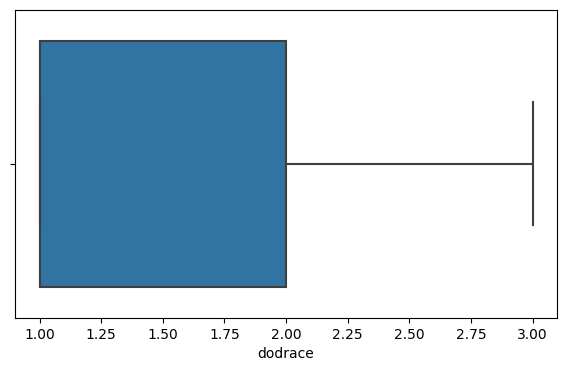

In [40]:
sns.boxplot(x = "dodrace",data = df);

In [41]:
df["dodrace"] = df.dodrace.map({
    1: "White",
    2: "Black",
    3: "Hispanic"
})

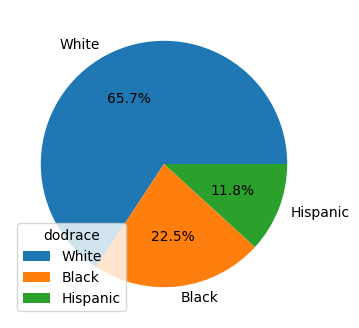

In [42]:
fig, ax = plt.subplots()
ax.pie(df.dodrace.value_counts(), labels=df.dodrace.value_counts().index, autopct='%1.1f%%')
ax.legend(df.dodrace.value_counts().index, title="dodrace", loc="lower left")
plt.show()

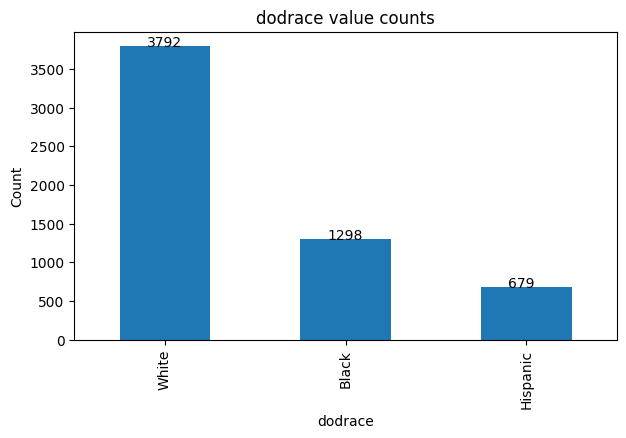

In [43]:
ax = df.dodrace.value_counts().plot(kind="bar")
ax.set_xlabel("dodrace")
ax.set_ylabel("Count")
ax.set_title("dodrace value counts")
for i, v in enumerate(df.dodrace.value_counts()):
    ax.text(i - 0.1, v + 0.5, str(v))
plt.show()


In [44]:
df.dodrace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: dodrace, dtype: int64

In [45]:
object_cols = df.select_dtypes("object")
object_cols

,gender,date,installation,component,branch,primarymos,subjectsbirthlocation,ethnicity,dodrace,writingpreference
0,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,NaN,Black,Right hand
1,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,Mexican,Hispanic,Right hand
2,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,NaN,White,Right hand
3,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,Caribbean Islander,Black,Right hand
4,Female,5-Oct-10,Fort Hood,Regular Army,Combat Arms,42A,Texas,NaN,White,Right hand
...,...,...,...,...,...,...,...,...,...,...
6063,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,11B,Colorado,Blackfoot Cherokee Choctaw,White,Right hand
6064,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,91B,Oklahoma,NaN,White,Right hand
6065,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13B,Oklahoma,NaN,White,Right hand
6066,Male,4-Apr-12,Camp Shelby,Army National Guard,Combat Arms,13P,Oklahoma,NaN,White,Right hand


## Ethnicity

self-reported ethnicity (verified through interview); e.g. “Mexican”, “Vietnamese”

In [46]:
df.ethnicity.value_counts(dropna = False)

NaN                                  4644
Mexican                               356
Puerto Rican                          183
Caribbean Islander                    123
Cherokee                               60
                                     ... 
Chinese Vietnamese                      1
Undisclosed Native American Tribe       1
Cherokee Yaqui                          1
Aztec Mexican                           1
Blackfoot Cherokee Choctaw              1
Name: ethnicity, Length: 158, dtype: int64

In [47]:
df.ethnicity.unique()

array([nan, 'Mexican', 'Caribbean Islander', 'Dominican', 'Cherokee',
       'Puerto Rican', 'Cochiti Pueblo Mexican',
       'Algonquin Navajo Penobscot', 'Chilean Mexican', 'Nicaraguan',
       'Arab or Middle Eastern', 'Argentine', 'Peruvian',
       'Belizean Dominican', 'Cuban Mexican', 'Apache Cherokee',
       'Comanche', 'Honduran', 'Korean', 'Ecuadorian',
       'Cherokee Puerto Rican', 'Salvadoran', 'Puerto Rican Seneca',
       'Cuban Puerto Rican', 'Samoan',
       'Arab or Middle Eastern Venezuelan', 'Bolivian', 'Potawatomi',
       'Cherokee Choctaw Mexican', 'Thai', 'Blackfoot Cherokee',
       'Honduran Panamanian', 'Seminole', 'Brazilian', 'Cuban',
       'Caribbean Islander Chinese East/Asian Indian',
       'Cherokee Hawaiian', 'Filipino', 'Ecuadorian Puerto Rican',
       'Panamanian', 'Choctaw Cherokee', 'Colombian', 'Chippewa',
       'Paraguayan', 'Chilean', 'Blackfoot', 'Cherokee Mexican',
       'Dominican Puerto Rican', 'Guamanian/Chamorro', 'Muscogee',
      

In [48]:
df.ethnicity.isnull().sum()

4644

In [49]:
## There are so many nulls. And other values are meaningless. So i dropped the column.

In [50]:
df. drop("ethnicity", axis = 1, inplace = True)

## Subjects Birth Location

Subject Birth Location; a U.S. state or foreign country

In [51]:
df.subjectsbirthlocation.value_counts()

California                417
New York                  411
Texas                     386
Indiana                   264
Illinois                  210
                         ... 
Bosnia and Herzegovina      1
Bermuda                     1
Denmark                     1
South Korea                 1
Guatemala                   1
Name: subjectsbirthlocation, Length: 136, dtype: int64

## Date

Date the participant was measured, ranging from “04-Oct-10” to “05-Apr-12”.So we dont need this column.

In [52]:
df. drop("date", axis = 1, inplace = True)

## Installation

U.S. Army installation where the measurement occurred; e.g. “Fort Hood”, “Camp Shelby”

In [53]:
df.installation.value_counts(dropna = False)

Camp Shelby       1111
Fort Bliss         925
Fort Gordon        636
Camp Atterbury     432
Fort McCoy         432
Fort Hood          416
Fort Huachuca      404
Fort Bragg         373
Fort Drum          369
Fort Lee           356
Fort Stewart       314
Fort Rucker          1
Name: installation, dtype: int64

In [54]:
## I think installation place is not important. So i drop this column.

In [55]:
df.drop("installation", axis = 1, inplace = True)

In [56]:
df.select_dtypes("object")

,gender,component,branch,primarymos,subjectsbirthlocation,dodrace,writingpreference
0,Female,Regular Army,Combat Support,92Y,Germany,Black,Right hand
1,Female,Regular Army,Combat Service Support,25U,California,Hispanic,Right hand
2,Female,Regular Army,Combat Service Support,35D,Texas,White,Right hand
3,Female,Regular Army,Combat Service Support,25U,District of Columbia,Black,Right hand
4,Female,Regular Army,Combat Arms,42A,Texas,White,Right hand
...,...,...,...,...,...,...,...
6063,Male,Army National Guard,Combat Arms,11B,Colorado,White,Right hand
6064,Male,Army National Guard,Combat Arms,91B,Oklahoma,White,Right hand
6065,Male,Army National Guard,Combat Arms,13B,Oklahoma,White,Right hand
6066,Male,Army National Guard,Combat Arms,13P,Oklahoma,White,Right hand


## Component

“Army National Guard”, “Army Reserve”, or “Regular Army”

In [57]:
df.component.value_counts(dropna = False)

Regular Army           2955
Army National Guard    2607
Army Reserve            207
Name: component, dtype: int64

In [58]:
df.groupby(["component"])["dodrace"].value_counts(normalize=True)

component            dodrace 
Army National Guard  White       0.711546
                     Black       0.191408
                     Hispanic    0.097046
Army Reserve         White       0.550725
                     Black       0.251208
                     Hispanic    0.198068
Regular Army         White       0.616920
                     Black       0.252792
                     Hispanic    0.130288
Name: dodrace, dtype: float64

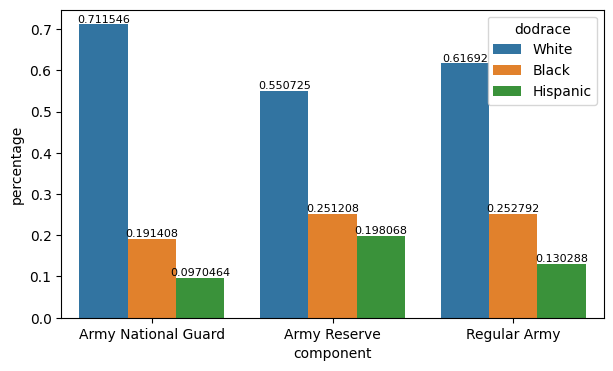

In [59]:
grouped_df = df.groupby(["component"])["dodrace"].value_counts(normalize=True).reset_index(name="percentage")
ax = sns.barplot(x="component", y="percentage", hue="dodrace", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [60]:
##Which component a person works on is not important in determining race. 
##Therefore, this column should also be dropped.

In [61]:
df.drop("component", axis = 1, inplace = True)

In [62]:
df.select_dtypes("object")

,gender,branch,primarymos,subjectsbirthlocation,dodrace,writingpreference
0,Female,Combat Support,92Y,Germany,Black,Right hand
1,Female,Combat Service Support,25U,California,Hispanic,Right hand
2,Female,Combat Service Support,35D,Texas,White,Right hand
3,Female,Combat Service Support,25U,District of Columbia,Black,Right hand
4,Female,Combat Arms,42A,Texas,White,Right hand
...,...,...,...,...,...,...
6063,Male,Combat Arms,11B,Colorado,White,Right hand
6064,Male,Combat Arms,91B,Oklahoma,White,Right hand
6065,Male,Combat Arms,13B,Oklahoma,White,Right hand
6066,Male,Combat Arms,13P,Oklahoma,White,Right hand


## Branch

“Combat Arms”, “Combat Support”, or “Combat Service Support”

In [63]:
df.branch.value_counts(dropna = False)

Combat Service Support    3021
Combat Arms               1508
Combat Support            1240
Name: branch, dtype: int64

In [64]:
df.groupby(["branch"])["dodrace"].value_counts(normalize=True)

branch                  dodrace 
Combat Arms             White       0.759947
                        Hispanic    0.125332
                        Black       0.114721
Combat Service Support  White       0.632572
                        Black       0.246607
                        Hispanic    0.120821
Combat Support          White       0.592742
                        Black       0.306452
                        Hispanic    0.100806
Name: dodrace, dtype: float64

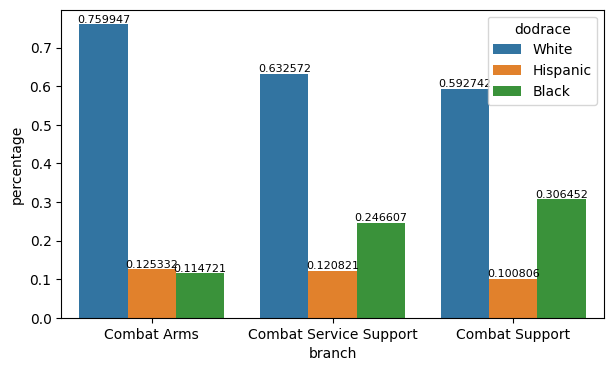

In [65]:
grouped_df = df.groupby(["branch"])["dodrace"].value_counts(normalize=True).reset_index(name="percentage")
ax = sns.barplot(x="branch", y="percentage", hue="dodrace", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [66]:
##Which branch a person works on is not important in determining race. 
##Therefore, this column should also be dropped.

In [67]:
df.drop("branch", axis = 1, inplace = True)

In [68]:
df.select_dtypes("object")

,gender,primarymos,subjectsbirthlocation,dodrace,writingpreference
0,Female,92Y,Germany,Black,Right hand
1,Female,25U,California,Hispanic,Right hand
2,Female,35D,Texas,White,Right hand
3,Female,25U,District of Columbia,Black,Right hand
4,Female,42A,Texas,White,Right hand
...,...,...,...,...,...
6063,Male,11B,Colorado,White,Right hand
6064,Male,91B,Oklahoma,White,Right hand
6065,Male,13B,Oklahoma,White,Right hand
6066,Male,13P,Oklahoma,White,Right hand


## Primary MOS

Primary Military Occupational Specialty

In [69]:
df.primarymos.value_counts(dropna = False)

11B     641
88M     308
92A     275
91B     224
68W     207
       ... 
88D       1
270A      1
356H      1
35Q       1
91l       1
Name: primarymos, Length: 281, dtype: int64

In [70]:
#There are letters and numbers that I can't understand for this feature. 
#Therefore, this column should also be dropped.

In [71]:
df.drop("primarymos", axis = 1, inplace = True)

In [72]:
df.select_dtypes("object")

,gender,subjectsbirthlocation,dodrace,writingpreference
0,Female,Germany,Black,Right hand
1,Female,California,Hispanic,Right hand
2,Female,Texas,White,Right hand
3,Female,District of Columbia,Black,Right hand
4,Female,Texas,White,Right hand
...,...,...,...,...
6063,Male,Colorado,White,Right hand
6064,Male,Oklahoma,White,Right hand
6065,Male,Oklahoma,White,Right hand
6066,Male,Oklahoma,White,Right hand


In [73]:
df.shape

(5769, 101)

## Height (in)

Height in Inches; self-reported, comparable to measured “stature”

In [74]:
df.heightin.value_counts(dropna = False)

69    605
70    551
71    537
66    522
68    511
67    485
72    468
64    368
65    299
73    283
63    249
74    232
62    208
75    114
61     89
60     72
76     68
77     36
59     30
78     15
80      7
57      5
79      5
58      4
81      2
56      1
87      1
86      1
94      1
Name: heightin, dtype: int64

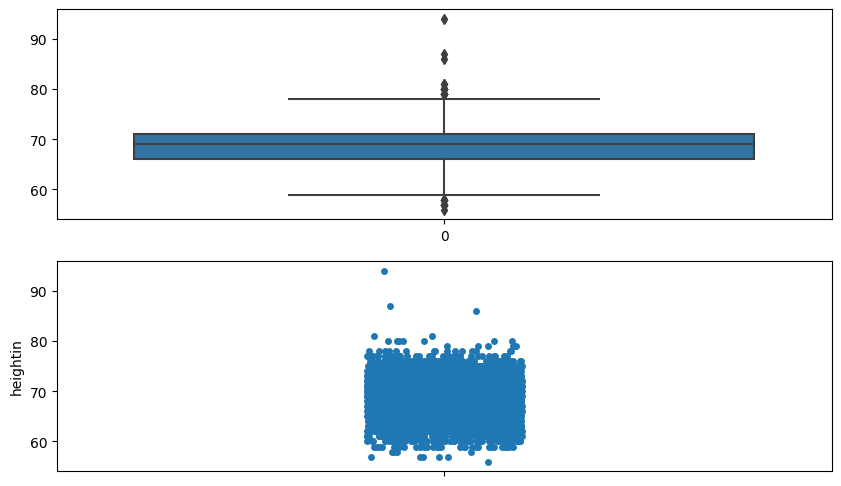

In [75]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.heightin)

plt.subplot(212)
sns.stripplot(df.heightin);

In [76]:
## We need to convert from inches to centimeters. 
#1 cm = 0.3937 in

In [77]:
df["heightcm"] = round(df["heightin"] / 0.3937)

In [78]:
df.heightcm.value_counts()

175.0    605
178.0    551
180.0    537
168.0    522
173.0    511
170.0    485
183.0    468
163.0    368
165.0    299
185.0    283
160.0    249
188.0    232
157.0    208
191.0    114
155.0     89
152.0     72
193.0     68
196.0     36
150.0     30
198.0     15
203.0      7
145.0      5
201.0      5
147.0      4
206.0      2
142.0      1
221.0      1
218.0      1
239.0      1
Name: heightcm, dtype: int64

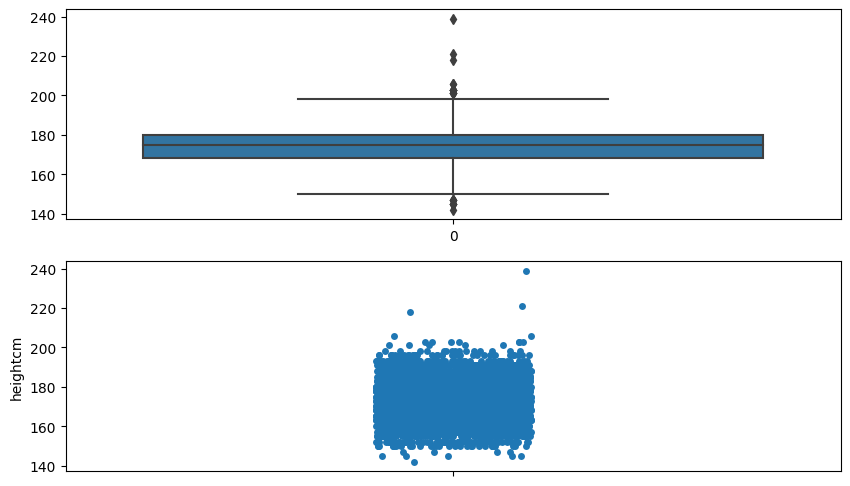

In [79]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.heightcm)

plt.subplot(212)
sns.stripplot(df.heightcm);

In [80]:
df.drop("heightin", axis = 1, inplace = True)

In [81]:
df.drop("heightcm", axis = 1, inplace = True)

## Weight (lbs)

Weight in Pounds; self-reported, comparable to measured “weightkg”

In [82]:
df.weightlbs.value_counts()

170    224
180    219
150    216
175    204
160    203
      ... 
293      1
252      1
283      1
0        1
290      1
Name: weightlbs, Length: 188, dtype: int64

In [83]:
## We need to convert from pounds to kilograms. 
#1 pound = 0.45359237 kg

In [84]:
df["weightkgs"] = round(df["weightlbs"] * 0.45359237)

In [85]:
df["weightkgs"].value_counts

<bound method IndexOpsMixin.value_counts of 0       64.0
1       54.0
2       67.0
3       79.0
4       88.0
        ... 
6063    73.0
6064    88.0
6065    84.0
6066    75.0
6067    99.0
Name: weightkgs, Length: 5769, dtype: float64>

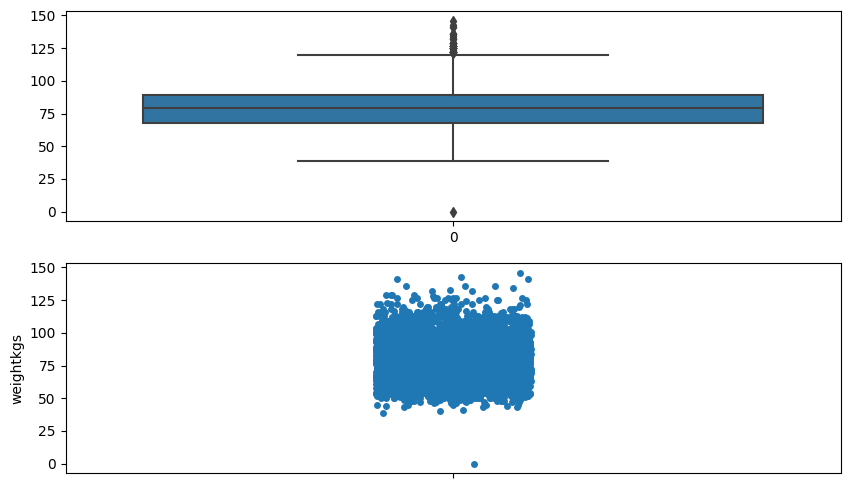

In [86]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.weightkgs)

plt.subplot(212)
sns.stripplot(df.weightkgs);

In [87]:
# I don't think a person's weight is an important value in estimating race. So we drop this column

In [88]:
df.drop("weightlbs", axis = 1, inplace = True)

In [89]:
df.drop("weightkgs", axis = 1, inplace = True)

## Writing Preference

Writing Preference; “Right hand”, “Left hand”, or “Either hand (No preference)”

In [90]:
df.writingpreference.value_counts()

Right hand                     5088
Left hand                       622
Either hand (No preference)      59
Name: writingpreference, dtype: int64

In [91]:
df.groupby(["writingpreference"])["dodrace"].value_counts(normalize=True)

writingpreference            dodrace 
Either hand (No preference)  White       0.728814
                             Black       0.220339
                             Hispanic    0.050847
Left hand                    White       0.678457
                             Black       0.241158
                             Hispanic    0.080386
Right hand                   White       0.653892
                             Black       0.223074
                             Hispanic    0.123035
Name: dodrace, dtype: float64

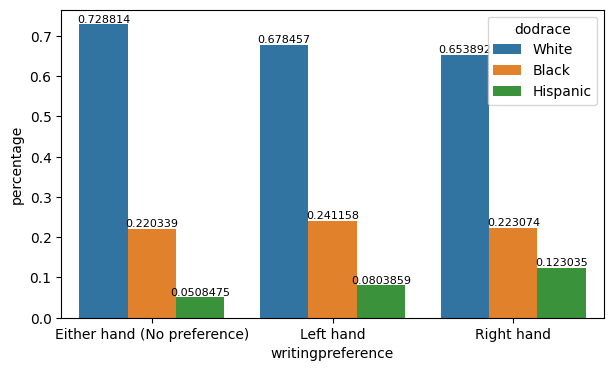

In [92]:
grouped_df = df.groupby(["writingpreference"])["dodrace"].value_counts(normalize=True).reset_index(name="percentage")
ax = sns.barplot(x="writingpreference", y="percentage", hue="dodrace", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

## Subject Numeric Race

Subject Numeric Race; a single or multi-digit code indicating a subject’s self-reported race or races (verified through interview). Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American, 6 = Pacific Islander, 8 = Other

In [93]:
df.subjectnumericrace.value_counts()

1        3559
2        1025
3         541
31        159
8         106
51        102
21         60
23         34
28         26
251        20
41         19
18         16
61         15
25         13
38          9
351         9
42          6
62          6
231         6
35          5
235         4
63          3
43          3
218         3
431         2
423         2
2518        2
2351        2
451         1
4           1
238         1
358         1
318         1
651         1
425         1
42351       1
631         1
6           1
428         1
4251        1
Name: subjectnumericrace, dtype: int64

In [94]:
#Although it is stated in the information note that the values vary from 1 to 8, 
#there are very different values in the data set. Therefore, this column needs to be dropped as well.

In [95]:
df.drop("subjectnumericrace", axis = 1, inplace = True)

## Age

Participant’s age in years

In [96]:
df.age.value_counts()

21    365
22    353
23    337
24    318
20    302
26    298
25    297
27    263
28    256
19    240
31    225
29    211
30    205
32    151
33    147
41    140
40    130
42    130
38    127
37    122
39    120
35    119
36    108
18    105
34    105
44     93
43     80
45     75
46     56
47     55
48     49
49     37
50     37
51     31
53     22
52     17
56     12
54     12
55      9
58      5
57      4
17      1
Name: age, dtype: int64

In [97]:
df.age.unique()

array([26, 21, 23, 22, 45, 44, 24, 37, 33, 36, 40, 30, 19, 34, 31, 29, 28,
       42, 25, 43, 20, 27, 41, 35, 38, 18, 32, 46, 39, 50, 47, 48, 52, 49,
       51, 53, 56, 54, 55, 58, 17, 57], dtype=int64)

In [98]:
df.groupby(["age"])["dodrace"].value_counts()

age  dodrace 
17   Black         1
18   White        69
     Black        21
     Hispanic     15
19   White       159
                ... 
56   Hispanic      1
57   Black         2
     White         2
58   White         4
     Black         1
Name: dodrace, Length: 121, dtype: int64

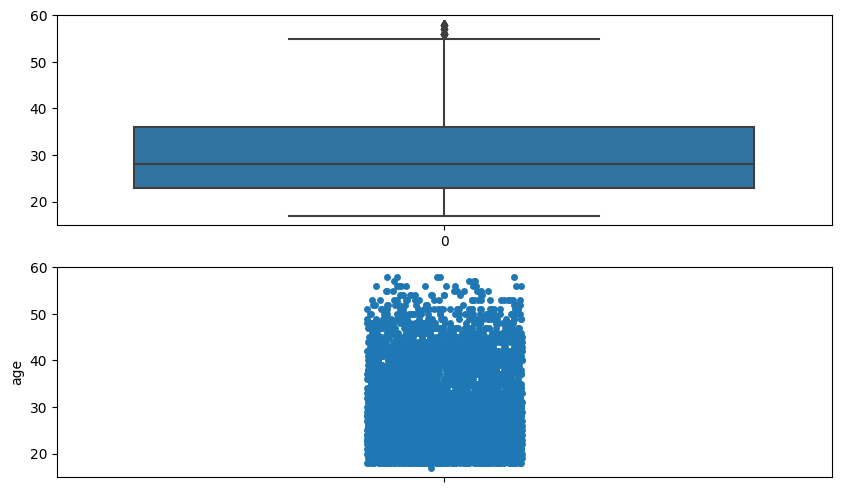

In [99]:
plt.figure(figsize=(10,6))

plt.subplot(211)
sns.boxplot(df.age)

plt.subplot(212)
sns.stripplot(df.age);

## Gender

In [100]:
df.gender.value_counts()

Male      3899
Female    1870
Name: gender, dtype: int64

In [101]:
df.groupby(["gender"])["dodrace"].value_counts(normalize=True)

gender  dodrace 
Female  White       0.521390
        Black       0.350802
        Hispanic    0.127807
Male    White       0.722493
        Black       0.164658
        Hispanic    0.112849
Name: dodrace, dtype: float64

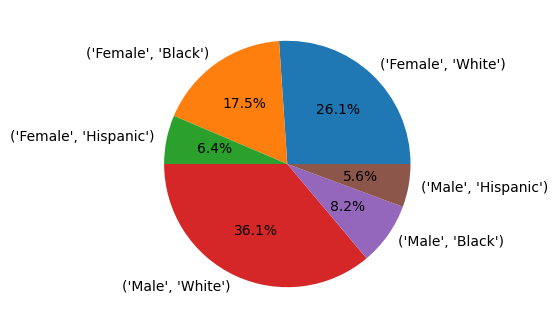

In [102]:
fig, ax = plt.subplots()
ax.pie(df.groupby(["gender"])["dodrace"].value_counts(normalize=True), labels=df.groupby(["gender"])["dodrace"].value_counts(normalize=True).index, autopct='%1.1f%%')
plt.show()

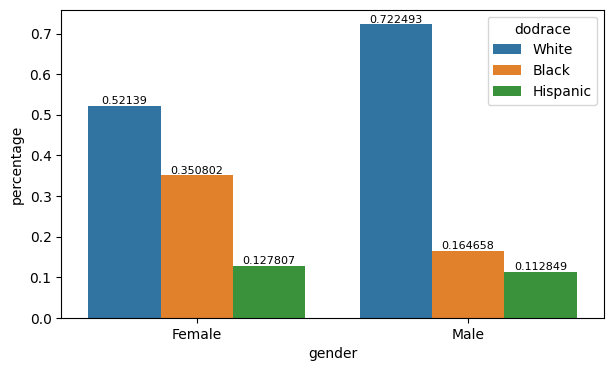

In [103]:
grouped_df = df.groupby(["gender"])["dodrace"].value_counts(normalize=True).reset_index(name="percentage")
ax = sns.barplot(x="gender", y="percentage", hue="dodrace", data=grouped_df)
for p in ax.containers:
    ax.bar_label(p, label_type="edge", fontsize=8)
plt.show()

In [104]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

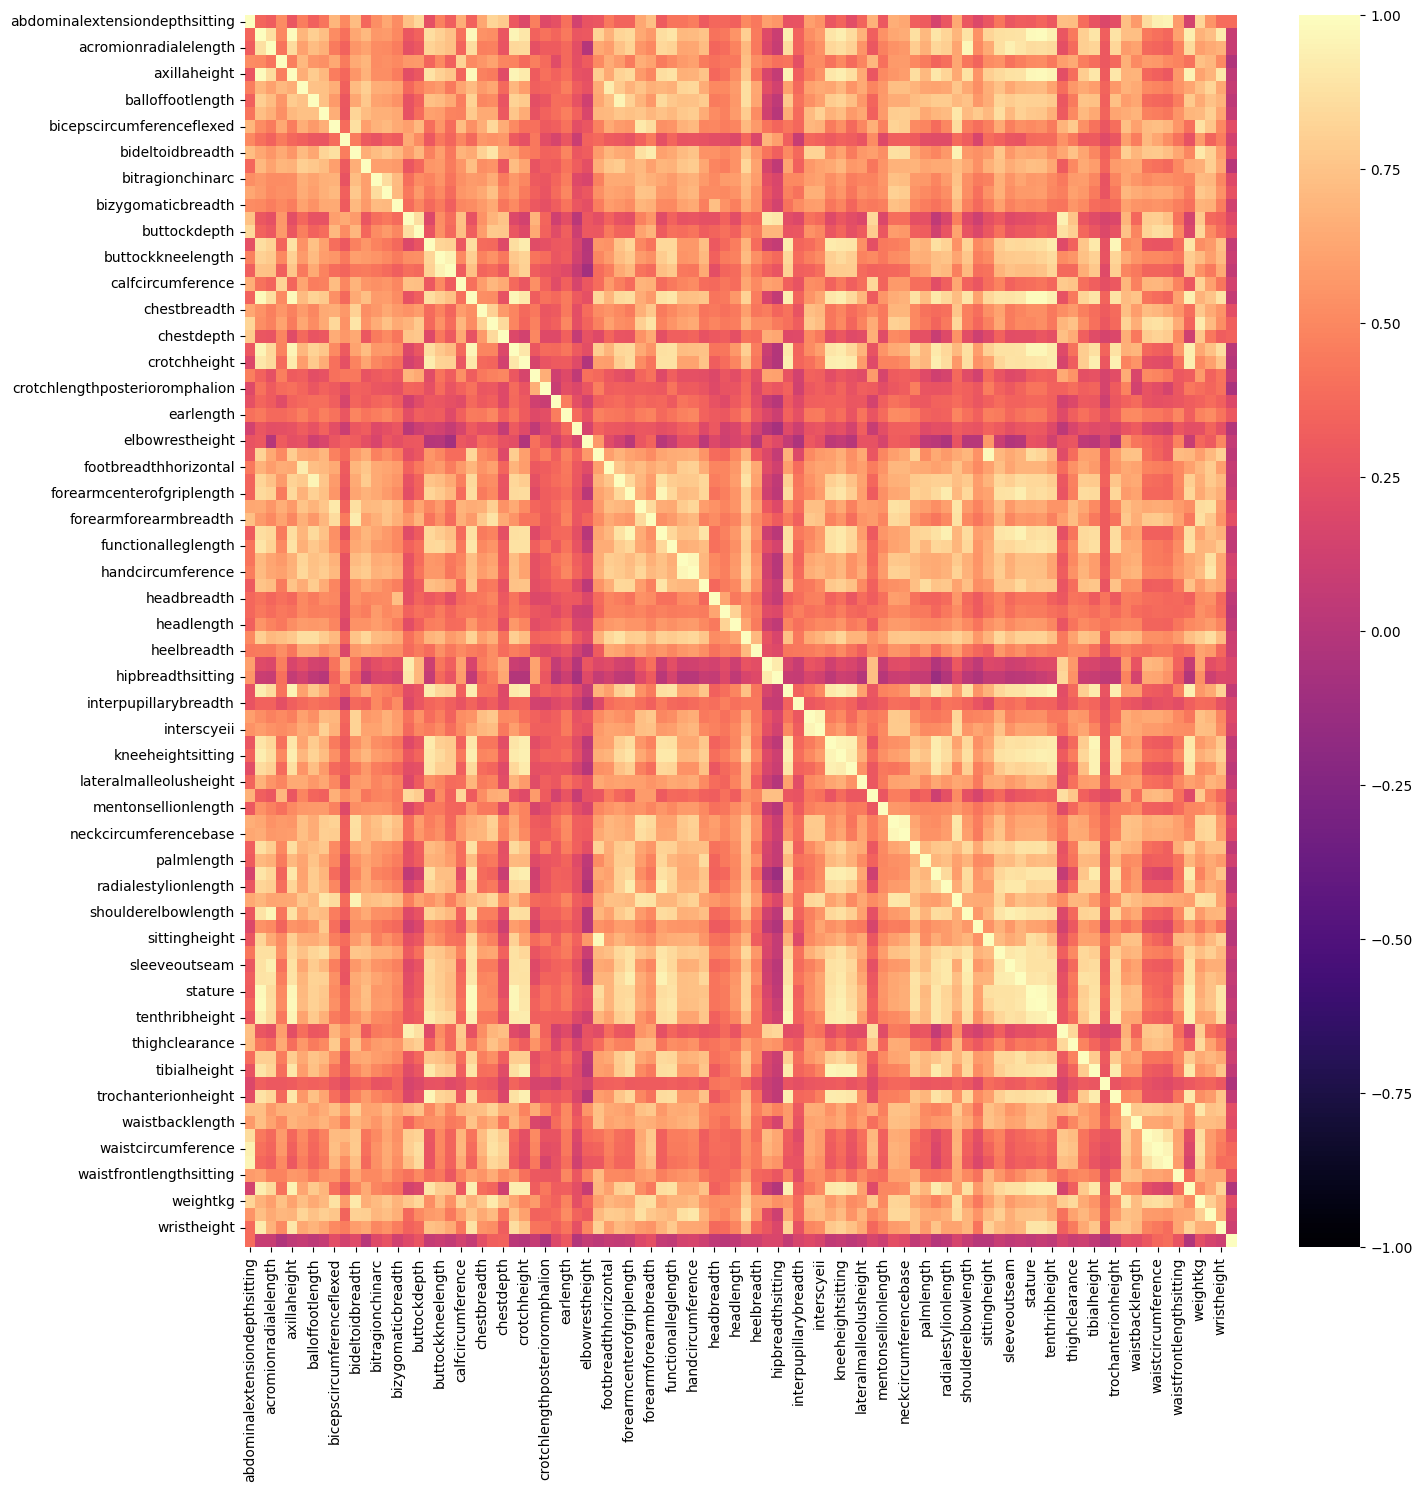

In [105]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap = "magma");

## Multicollinarity

In [106]:
df_numeric = df.select_dtypes("number")
df_numeric

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,age
0,231,1282,301,204,1180,222,177,373,315,263,...,406,295,850,217,345,942,657,152,756,26
1,194,1379,320,207,1292,225,178,372,272,250,...,422,254,708,168,329,1032,534,155,815,21
2,183,1369,329,233,1271,237,196,397,300,276,...,419,269,727,159,367,1035,663,162,799,23
3,261,1356,306,214,1250,240,188,384,364,276,...,451,302,923,235,371,999,782,173,818,22
4,309,1303,308,214,1210,217,182,378,320,336,...,452,405,1163,300,380,911,886,152,762,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,235,1353,312,216,1263,228,193,384,318,241,...,442,279,816,210,347,1016,675,163,778,22
6064,247,1473,336,234,1346,253,196,428,374,284,...,475,351,978,235,385,1082,896,178,873,22
6065,264,1394,313,227,1280,245,193,407,367,271,...,483,333,991,258,353,1011,832,178,822,23
6066,203,1417,327,223,1314,250,196,419,365,271,...,430,293,783,192,350,1062,731,172,837,22


In [107]:
from termcolor import cprint

def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .6 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"Multicolinearity alert in between --> {col} - {i} --> {round(df_temp[col][i], 6)}", "red", attrs=["bold"])
    else:
#         cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])
        pass

In [108]:
multicolinearity_control(df_numeric)

Multicolinearity alert in between --> abdominalextensiondepthsitting - bicepscircumferenceflexed --> 0.691126
Multicolinearity alert in between --> abdominalextensiondepthsitting - bideltoidbreadth --> 0.724344
Multicolinearity alert in between --> abdominalextensiondepthsitting - bitragionsubmandibulararc --> 0.626294
Multicolinearity alert in between --> abdominalextensiondepthsitting - buttockcircumference --> 0.739481
Multicolinearity alert in between --> abdominalextensiondepthsitting - buttockdepth --> 0.840828
Multicolinearity alert in between --> abdominalextensiondepthsitting - calfcircumference --> 0.658512
Multicolinearity alert in between --> abdominalextensiondepthsitting - chestbreadth --> 0.627868
Multicolinearity alert in between --> abdominalextensiondepthsitting - chestcircumference --> 0.82583
Multicolinearity alert in between --> abdominalextensiondepthsitting - chestdepth --> 0.778442
Multicolinearity alert in between --> abdominalextensiondepthsitting - forearmcir

In [110]:
df.select_dtypes("object")

,gender,subjectsbirthlocation,dodrace,writingpreference
0,Female,Germany,Black,Right hand
1,Female,California,Hispanic,Right hand
2,Female,Texas,White,Right hand
3,Female,District of Columbia,Black,Right hand
4,Female,Texas,White,Right hand
...,...,...,...,...
6063,Male,Colorado,White,Right hand
6064,Male,Oklahoma,White,Right hand
6065,Male,Oklahoma,White,Right hand
6066,Male,Oklahoma,White,Right hand


In [111]:
df.reset_index(drop=True, inplace=True)

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score,\
                            precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, auc, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
from scikitplot.metrics import plot_roc_curve, plot_precision_recall_curve
from yellowbrick.model_selection import FeatureImportances 
from sklearn.linear_model import Ridge

In [113]:
X = df.drop(columns="dodrace")
y = df['dodrace']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [115]:
print("X_train shape : ", X_train.shape)
print("y_train shape   : ", y_train.shape)
print("X_test shape  : ", X_test.shape)
print("y_test shape    : ", y_test.shape)

X_train shape :  (4615, 97)
y_train shape   :  (4615,)
X_test shape  :  (1154, 97)
y_test shape    :  (1154,)


In [116]:
scaler = StandardScaler()

In [117]:
cat = X_train.select_dtypes("object").columns
cat

Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object')

In [118]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=StandardScaler())

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [119]:
from sklearn.pipeline import Pipeline

In [120]:
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression())]

pipe_log_model = Pipeline(steps=operations)

pipe_log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                ('logistic', LogisticRegression())])

## 1. Logistic model

### Vanilla Logistic Model

In [121]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [124]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[239   5  16]
 [ 15  79  42]
 [  5  29 724]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92       260
    Hispanic       0.70      0.58      0.63       136
       White       0.93      0.96      0.94       758

    accuracy                           0.90      1154
   macro avg       0.85      0.82      0.83      1154
weighted avg       0.90      0.90      0.90      1154


Train_Set
[[ 973    7   58]
 [  23  333  187]
 [  29   65 2940]]
              precision    recall  f1-score   support

       Black       0.95      0.94      0.94      1038
    Hispanic       0.82      0.61      0.70       543
       White       0.92      0.97      0.95      3034

    accuracy                           0.92      4615
   macro avg       0.90      0.84      0.86      4615
weighted avg       0.92      0.92      0.92      4615



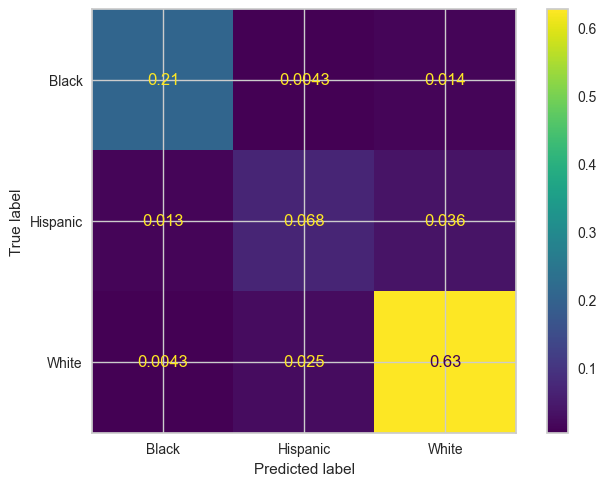

In [122]:
ConfusionMatrixDisplay.from_estimator(pipe_log_model,X_test, y_test,normalize='all')

## Cross Validation

In [123]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=StandardScaler())
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy               0.896851
train_accuracy              0.921271
test_precision_weighted     0.891776
train_precision_weighted    0.918297
test_recall_weighted        0.896851
train_recall_weighted       0.921271
test_f1_weighted            0.891535
train_f1_weighted           0.917488
dtype: float64

## Cross Validation for Hispanic Class


In [124]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=StandardScaler())
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
f1_hispanic = make_scorer(f1_score, average = None, labels =["Hispanic"])
precision_hispanic = make_scorer(precision_score, average = None, labels =["Hispanic"])
recall_hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])
cv = 10 
scoring = {"precision_hispanic": precision_hispanic, 
           "recall_hispanic": recall_hispanic, 
           "f1_hispanic": f1_hispanic}





In [128]:
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_hispanic     0.739862
train_precision_hispanic    0.826374
test_recall_hispanic        0.526599
train_recall_hispanic       0.609573
test_f1_hispanic            0.613672
train_f1_hispanic           0.701574
dtype: float64

### Logistic Model GridsearchCV

In [135]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=StandardScaler())
operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
penalty = ["l1","l2", None]
C = [0.5, 0.7, 1]
solver = ["lbfgs", "liblinear"]  
class_weight= ["balanced", None]
cv = 5
recall_hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])
param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}

In [136]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = recall_hispanic,
                          n_jobs = -1,
                          return_train_score=True)

In [137]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender', 'subjectsbirthlocation', 'writingpreference'], dtype='object'))])),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.5, 0.7, 1],
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2', None],
                         'logistic__solver': ['lbfgs', 'liblinear']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [138]:
grid_model.best_params_

{'logistic__C': 0.5,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l2',
 'logistic__solver': 'lbfgs'}

In [139]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[237  14   9]
 [ 14 101  21]
 [ 13 102 643]]
              precision    recall  f1-score   support

       Black       0.90      0.91      0.90       260
    Hispanic       0.47      0.74      0.57       136
       White       0.96      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[ 982   25   31]
 [  15  466   62]
 [  74  363 2597]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.93      1038
    Hispanic       0.55      0.86      0.67       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.88      4615



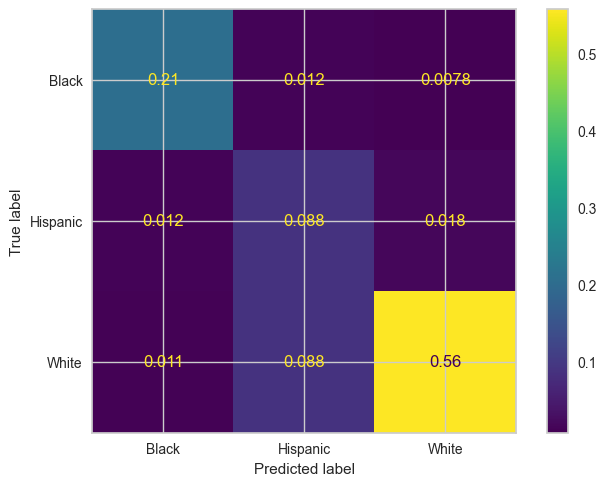

In [140]:
ConfusionMatrixDisplay.from_estimator(grid_model,X_test, y_test,normalize='all')

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

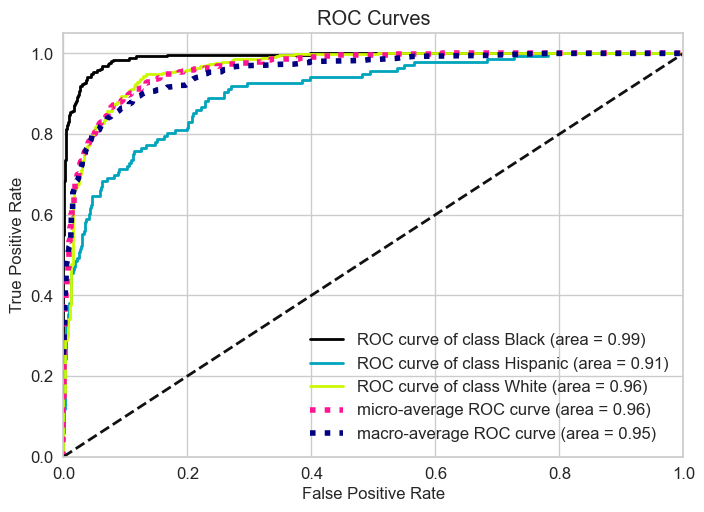

In [141]:
y_pred_proba = grid_model.predict_proba(X_test)
    
plot_roc_curve(y_test, y_pred_proba)
plt.show();

In [142]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

roc_auc_score(y_test_dummies[:, 1], y_pred_proba[:, 1])  
# roc_auc score  for hispanic

0.9059358026118108

##  Precision Recall Curve

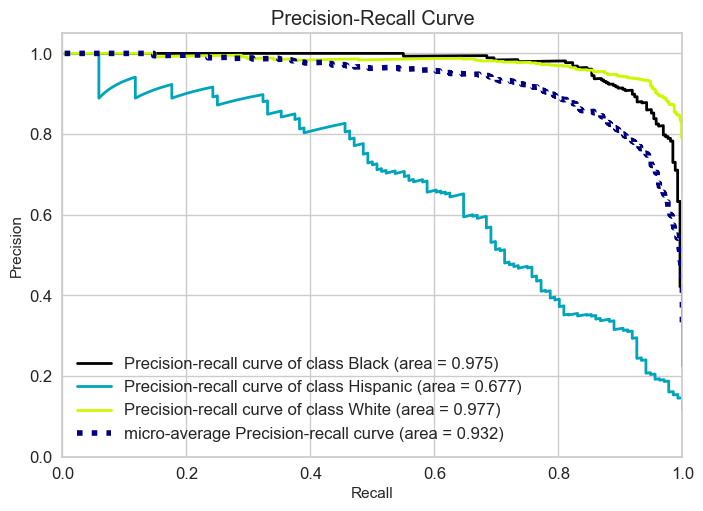

In [143]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall  
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [144]:
from sklearn.metrics import average_precision_score, roc_auc_score

y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
# precision-recall  for hispanic

0.6766159236996017

## 2. SVC

In [145]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

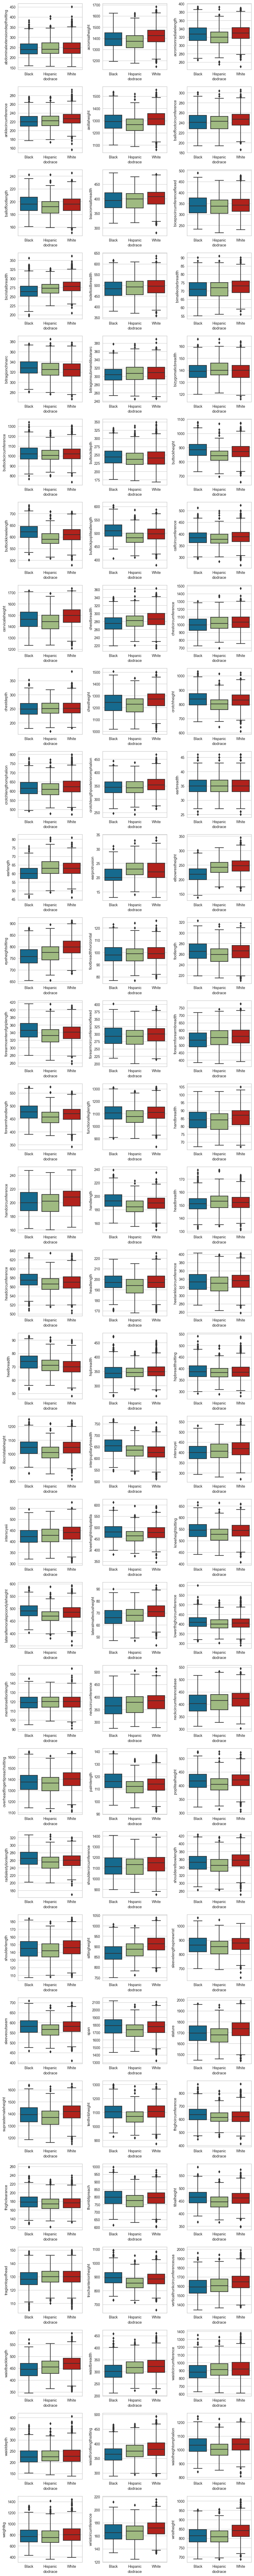

In [145]:
fig = plt.figure(figsize=(10,100))

for i, col in enumerate(df.columns[:-1]):
    if i < 93:
        plt.subplot(31,3,i+1)
        ax = sns.boxplot(x="dodrace", y=df[col], data=df)

plt.tight_layout();

### Vanilla SVC model 

In [146]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=StandardScaler())
operations = [("OneHot_Ordinal_Encoder", column_trans), ("svc_vanilla", SVC())]
svc_vanilla_pipe = Pipeline(steps=operations)
svc_vanilla_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'component', 'branch', 'subjectsbirthlocation',
       'writingpreference'],
      dtype='object'))])),
                ('svc_vanilla', SVC())])

In [147]:
y_pred = svc_vanilla_pipe.predict(X_test)
y_pred

array(['Black', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

In [148]:
eval_metric(svc_vanilla_pipe, X_train, y_train, X_test, y_test)

Test_Set
[[237   4  19]
 [ 12  28  96]
 [  6   9 743]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.68      0.21      0.32       136
       White       0.87      0.98      0.92       758

    accuracy                           0.87      1154
   macro avg       0.83      0.70      0.72      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[ 976    5   57]
 [  41  177  325]
 [  16    9 3009]]
              precision    recall  f1-score   support

       Black       0.94      0.94      0.94      1038
    Hispanic       0.93      0.33      0.48       543
       White       0.89      0.99      0.94      3034

    accuracy                           0.90      4615
   macro avg       0.92      0.75      0.79      4615
weighted avg       0.90      0.90      0.88      4615



## Cross Validation

In [150]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=StandardScaler())
operations = [("OneHotEncoder", column_trans), (("SVC", SVC()))]
model = Pipeline(steps=operations)

recall_hispanic = make_scorer(recall_score, average = None, labels =["Hispanic"])

scoring = {"recall_hispanic": recall_hispanic}
scores = cross_validate(model, X_train, y_train, scoring = scoring, 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_recall_hispanic     0.235690
train_recall_hispanic    0.319412
dtype: float64

###  SVC Model GridsearchCV

In [151]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=StandardScaler())
operations = [("OneHot_Ordinal_Encoder", column_trans), ("SVC", SVC(class_weight="balanced",random_state=42))]
svc_pipe = Pipeline(steps=operations)
param_grid = {'SVC__C':[0.01, 0.1, 1, 10],
              'SVC__kernel':['linear','rbf','sigmoid','poly'],
              'SVC__gamma':["scale", "auto"],
              'SVC__degree':[2,3],
              'SVC__class_weight': [None, 'balanced']}
svc_grid_model = GridSearchCV(svc_pipe, param_grid = param_grid, scoring=recall_hispanic, cv=5, return_train_score=True, n_jobs=-1)
svc_grid_model.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['gender', 'component', 'branch', 'subjectsbirthlocation',
       'writingpreference'],
      dtype='object'))])),
                                       ('SVC',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 1, 10],
                         'SVC__class_weight': [None, 'balanced'],
                         'SVC__degree': [2, 3], 'SVC__gamma': ['scale', 'auto'],
                         'SVC__kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

param_grid = {
    "svc__C" : [0.01, 0.1, 0.7, 1],
    "svc__gamma" : ["scale", "auto", 0.01, 0.001],
    "svc__kernel" : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
}

In [152]:
svc_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['gender', 'component', 'branch', 'subjectsbirthlocation',
       'writingpreference'],
      dtype='object'))])),
                ('SVC',
                 SVC(C=0.1, class_weight='balanced', degree=2, kernel='linear',
                     random_state=42))])

In [153]:
svc_grid_model.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': 'balanced',
 'SVC__degree': 2,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

In [154]:
pd.DataFrame(svc_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVC__C,param_SVC__class_weight,param_SVC__degree,param_SVC__gamma,param_SVC__kernel,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.368959,0.108337,0.648680,0.031397,0.01,None,2,scale,linear,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",...,0.232008,0.026712,77,0.234483,0.275862,0.239631,0.276498,0.331797,0.271654,0.034830
1,7.696133,1.182908,1.951995,0.815625,0.01,None,2,scale,rbf,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",...,0.000000,0.000000,106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,9.667767,1.930003,1.707214,0.403321,0.01,None,2,scale,sigmoid,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",...,0.000000,0.000000,106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,11.818089,0.610880,1.596594,0.083388,0.01,None,2,scale,poly,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",...,0.000000,0.000000,106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5.450871,0.495797,0.954908,0.101835,0.01,None,2,auto,linear,"{'SVC__C': 0.01, 'SVC__class_weight': None, 'S...",...,0.232008,0.026712,77,0.234483,0.275862,0.239631,0.276498,0.331797,0.271654,0.034830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,6.280833,0.328445,1.045268,0.105737,10,balanced,3,scale,poly,"{'SVC__C': 10, 'SVC__class_weight': 'balanced'...",...,0.456779,0.059493,62,0.983908,0.979310,0.988479,0.988479,0.981567,0.984349,0.003673
124,31.620781,4.567339,0.357230,0.140092,10,balanced,3,auto,linear,"{'SVC__C': 10, 'SVC__class_weight': 'balanced'...",...,0.710924,0.048101,13,0.901149,0.896552,0.889401,0.928571,0.907834,0.904702,0.013362
125,3.344144,0.597711,1.430318,0.554830,10,balanced,3,auto,rbf,"{'SVC__C': 10, 'SVC__class_weight': 'balanced'...",...,0.653772,0.038333,25,0.947126,0.951724,0.949309,0.958525,0.956221,0.952581,0.004237
126,3.883846,0.251226,0.741138,0.084554,10,balanced,3,auto,sigmoid,"{'SVC__C': 10, 'SVC__class_weight': 'balanced'...",...,0.535729,0.129402,49,0.616092,0.427586,0.619816,0.631336,0.562212,0.571408,0.075764


In [156]:
eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[241  11   8]
 [ 16  97  23]
 [ 15  93 650]]
              precision    recall  f1-score   support

       Black       0.89      0.93      0.91       260
    Hispanic       0.48      0.71      0.58       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.77      0.83      0.80      1154
weighted avg       0.88      0.86      0.87      1154


Train_Set
[[ 983   27   28]
 [  21  456   66]
 [  66  368 2600]]
              precision    recall  f1-score   support

       Black       0.92      0.95      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



In [157]:
pd.DataFrame(svc_grid_model.cv_results_).loc[svc_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.747774
mean_train_score    0.846233
Name: 48, dtype: object

In [159]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), remainder=StandardScaler())
operations = [("OneHot_Ordinal_Encoder", column_trans), ("SVC", SVC(C = 0.1, kernel = 'linear', class_weight = "balanced", random_state = 42))]
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = recall_hispanic, cv = 10,
                       return_train_score=True, n_jobs = -1)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.763906
train_score    0.840799
dtype: float64

In [160]:
decision_function = svc_grid_model.decision_function(X_test)
decision_function

array([[ 2.29066091,  0.97805147, -0.29027234],
       [-0.26817333,  0.97462278,  2.26920633],
       [-0.27620714,  1.01267681,  2.27581745],
       ...,
       [ 2.29788231,  0.73166182, -0.27013087],
       [-0.29065816,  0.81423364,  2.29658134],
       [-0.27485837,  1.2147722 ,  2.24762052]])

In [161]:
svc_grid_model.predict(X_test)

array(['Black', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

In [162]:
svc_grid_model.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': 'balanced',
 'SVC__degree': 2,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'linear'}

## 3. RF

### Vanilla RF Model

In [164]:
from sklearn.ensemble import RandomForestClassifier

cat_ordinal = X_train.select_dtypes("object").columns.to_list()

column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_ordinal), remainder="passthrough")
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=42))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender', 'component',
                                                   'branch',
                                                   'subjectsbirthlocation',
                                                   'writingpreference'])])),
                ('RF_model', RandomForestClassifier(random_state=42))])

In [165]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[199   4  57]
 [ 11   7 118]
 [  8   3 747]]
              precision    recall  f1-score   support

       Black       0.91      0.77      0.83       260
    Hispanic       0.50      0.05      0.09       136
       White       0.81      0.99      0.89       758

    accuracy                           0.83      1154
   macro avg       0.74      0.60      0.61      1154
weighted avg       0.80      0.83      0.78      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



## Cross Validation

In [166]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = recall_hispanic, 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.031313
train_score    1.000000
dtype: float64

In [167]:
pipe_model["RF_model"].feature_importances_

array([0.0051789 , 0.00161031, 0.00277445, 0.00945427, 0.00063884,
       0.00523025, 0.01016139, 0.00652767, 0.00809384, 0.00807098,
       0.00632436, 0.00672264, 0.00705932, 0.0084597 , 0.0299433 ,
       0.00627292, 0.00597579, 0.0241239 , 0.00865101, 0.00898571,
       0.00584708, 0.0078382 , 0.00867981, 0.01561086, 0.01605885,
       0.00652409, 0.00845217, 0.0104384 , 0.00646457, 0.00646633,
       0.00729214, 0.00889819, 0.00724303, 0.00815485, 0.00506984,
       0.01127781, 0.00987952, 0.03042512, 0.03769545, 0.00531682,
       0.00727057, 0.01661802, 0.0070068 , 0.00592016, 0.01922398,
       0.00667068, 0.00567488, 0.00740102, 0.01433565, 0.00656878,
       0.01496448, 0.00905161, 0.00613358, 0.03332728, 0.0073646 ,
       0.00579317, 0.0071981 , 0.03839789, 0.00643223, 0.00637304,
       0.00603373, 0.00585413, 0.00728572, 0.01447093, 0.00727103,
       0.0067689 , 0.00672038, 0.00729548, 0.00767695, 0.01475531,
       0.00490075, 0.02289597, 0.00738263, 0.00762185, 0.00561

In [168]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__gender', 'ordinalencoder__component',
       'ordinalencoder__branch', 'ordinalencoder__subjectsbirthlocation',
       'ordinalencoder__writingpreference',
       'remainder__abdominalextensiondepthsitting',
       'remainder__acromialheight', 'remainder__acromionradialelength',
       'remainder__anklecircumference', 'remainder__axillaheight',
       'remainder__balloffootcircumference',
       'remainder__balloffootlength', 'remainder__biacromialbreadth',
       'remainder__bicepscircumferenceflexed',
       'remainder__bicristalbreadth', 'remainder__bideltoidbreadth',
       'remainder__bimalleolarbreadth', 'remainder__bitragionchinarc',
       'remainder__bitragionsubmandibulararc',
       'remainder__bizygomaticbreadth', 'remainder__buttockcircumference',
       'remainder__buttockdepth', 'remainder__buttockheight',
       'remainder__buttockkneelength',
       'remainder__buttockpopliteallength',
       'remainder__calfcircumference', 'remainder__cervicale

In [169]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['gender',
 'component',
 'branch',
 'subjectsbirthlocation',
 'writingpreference',
 'abdominalextensiondepthsitting',
 'acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'axillaheight',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'buttockcircumference',
 'buttockdepth',
 'buttockheight',
 'buttockkneelength',
 'buttockpopliteallength',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestcircumference',
 'chestdepth',
 'chestheight',
 'crotchheight',
 'crotchlengthomphalion',
 'crotchlengthposterioromphalion',
 'earbreadth',
 'earlength',
 'earprotrusion',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmforearmbreadth',
 'forearmhandlength',
 'functionalleglen

In [170]:
rf_feature_imp = pd.DataFrame(data = pipe_model["RF_model"].feature_importances_, index = new_features, #index=X.columns
                              columns = ["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
sittingheight,0.042373
interpupillarybreadth,0.038398
eyeheightsitting,0.037695
heelbreadth,0.033327
elbowrestheight,0.030425
...,...
earbreadth,0.005070
poplitealheight,0.004901
branch,0.002774
component,0.001610


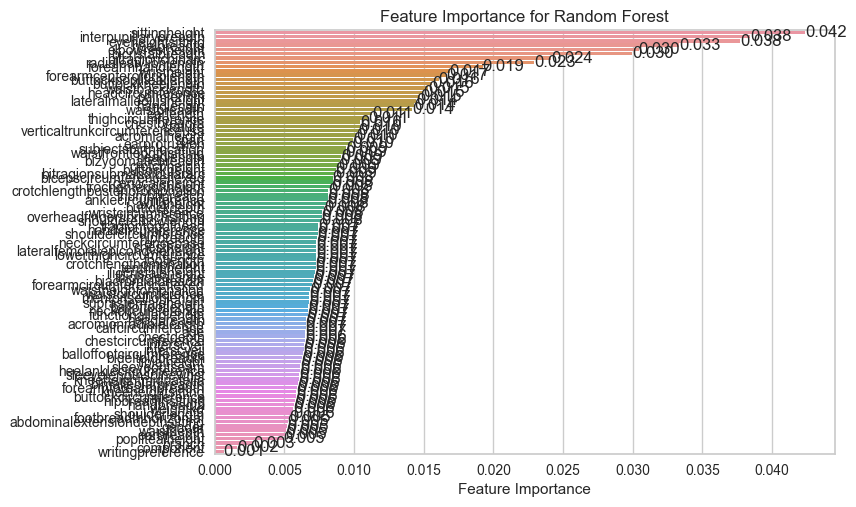

In [171]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

### RF Model GridsearchCV

In [172]:
column_trans = make_column_transformer((OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), cat_ordinal), remainder="passthrough")
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101))]

pipe_model = Pipeline(steps=operations)

param_grid = {'RF_model__n_estimators':[128, 200, 400, 500],
             'RF_model__max_features':[2, 4, 'sqrt'],
             'RF_model__max_depth':[2, 3, 4],
             'RF_model__max_samples':[0.8]} 

rf_grid_model = GridSearchCV(pipe_model, param_grid, scoring = recall_hispanic, cv = 5, return_train_score = True, n_jobs = -1, verbose=3).fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [173]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2,
 'RF_model__max_features': 4,
 'RF_model__max_samples': 0.8,
 'RF_model__n_estimators': 500}

In [174]:
rf_grid_model.best_index_

7

In [175]:
pd.DataFrame(rf_grid_model.cv_results_).loc[7, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.675756
mean_train_score    0.711765
Name: 7, dtype: object

In [176]:
rf_grid_model.best_score_

0.6757560312606185

In [177]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[185  58  17]
 [ 10  96  30]
 [ 66 337 355]]
              precision    recall  f1-score   support

       Black       0.71      0.71      0.71       260
    Hispanic       0.20      0.71      0.31       136
       White       0.88      0.47      0.61       758

    accuracy                           0.55      1154
   macro avg       0.60      0.63      0.54      1154
weighted avg       0.76      0.55      0.60      1154


Train_Set
[[ 711  248   79]
 [  37  389  117]
 [ 212 1400 1422]]
              precision    recall  f1-score   support

       Black       0.74      0.68      0.71      1038
    Hispanic       0.19      0.72      0.30       543
       White       0.88      0.47      0.61      3034

    accuracy                           0.55      4615
   macro avg       0.60      0.62      0.54      4615
weighted avg       0.77      0.55      0.60      4615



## 4. XGBoost

### Vanilla XGBoost Model

In [182]:
import xgboost as xgb
from xgboost import XGBClassifier

In [184]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=42))]

pipe_model_xgb = Pipeline(steps=operations_xgb)
y_train = y_train.map({"Black":0, 'Hispanic':1, 'White':2})

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['gender', 'component',
                                                   'branch',
                                                   'subjectsbirthlocation',
                                                   'writingpreference'])])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None,...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [186]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

AttributeError: module 'xgboost' has no attribute 'predict'

### XGBoost Model GridsearchCV

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [41]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [43]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

NameError: name 'y_test' is not defined

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___